### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### Load Data

In [ ]:
df=pd.read_csv('/content/Traffic.csv')

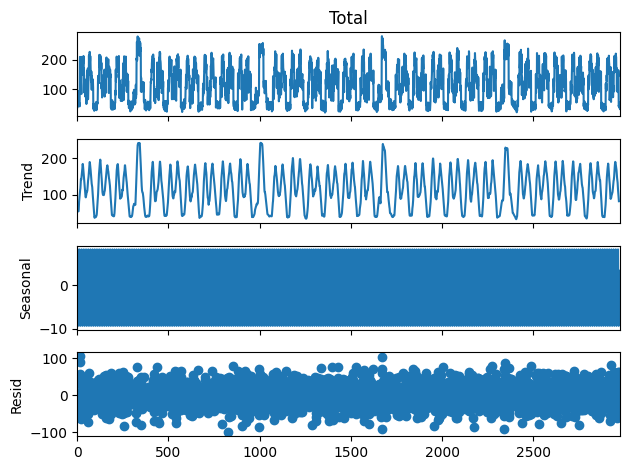

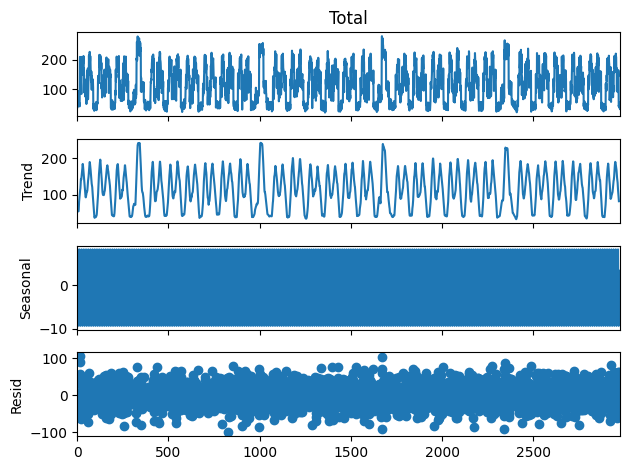

In [ ]:
result = seasonal_decompose(df['Total'], model='additive', period=12)
result.plot()

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
year = 2024
month = 3

df['Datetime'] = pd.to_datetime(df['Date'].astype(str).str.zfill(2) + '-' +
                                 df['Day of the week'] + ' ' +
                                 df['Time'], format='%d-%A %I:%M:%S %p')

df['Datetime'] = df['Datetime'].apply(lambda x: x.replace(year=year, month=month))

df.set_index('Datetime', inplace=True)

df.drop(columns=['Date', 'Time','CarCount','BikeCount','BusCount','TruckCount'], inplace=True)

print(df)

                    Day of the week  Total Traffic Situation
Datetime                                                    
2024-03-10 00:00:00         Tuesday     39               low
2024-03-10 00:15:00         Tuesday     55               low
2024-03-10 00:30:00         Tuesday     55               low
2024-03-10 00:45:00         Tuesday     58               low
2024-03-10 01:00:00         Tuesday     94            normal
...                             ...    ...               ...
2024-03-09 22:45:00        Thursday     56            normal
2024-03-09 23:00:00        Thursday     42            normal
2024-03-09 23:15:00        Thursday     45            normal
2024-03-09 23:30:00        Thursday     48            normal
2024-03-09 23:45:00        Thursday     33            normal

[2976 rows x 3 columns]


In [ ]:
df['Total']

,Total
Datetime,
2024-03-10 00:00:00,39
2024-03-10 00:15:00,55
2024-03-10 00:30:00,55
2024-03-10 00:45:00,58
2024-03-10 01:00:00,94
...,...
2024-03-09 22:45:00,56
2024-03-09 23:00:00,42
2024-03-09 23:15:00,45


In [ ]:
df['Traffic Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

<ipython-input-10-9aa33b09ffae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic Situation', y='Total', data=df, palette=custom_palette)


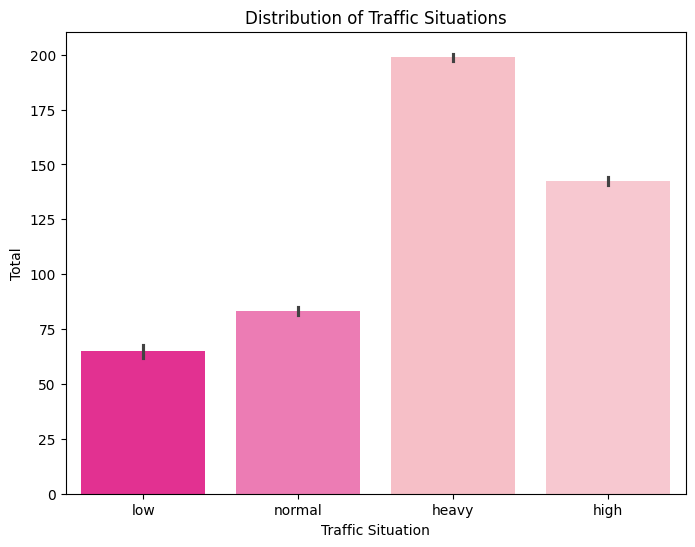

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
custom_palette = ["#FF1493", "#FF69B4", "#FFB6C1", "#FFC0CB"]
sns.barplot(x='Traffic Situation', y='Total', data=df, palette=custom_palette)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Total')
plt.show()

In [ ]:
grouped = df.groupby(['Total', 'Traffic Situation']).size().reset_index(name='Count')
print(grouped)

     Total Traffic Situation  Count
0       21               low      1
1       22               low      1
2       23               low      3
3       24               low      5
4       25               low      8
..     ...               ...    ...
366    262             heavy      1
367    265             heavy      1
368    272             heavy      2
369    278             heavy      1
370    279             heavy      1

[371 rows x 3 columns]


In [ ]:
df['Total'].describe()

,Total
count,2976.000000
mean,114.218414
std,60.190627
min,21.000000
25%,55.000000
50%,109.000000
75%,164.000000
max,279.000000


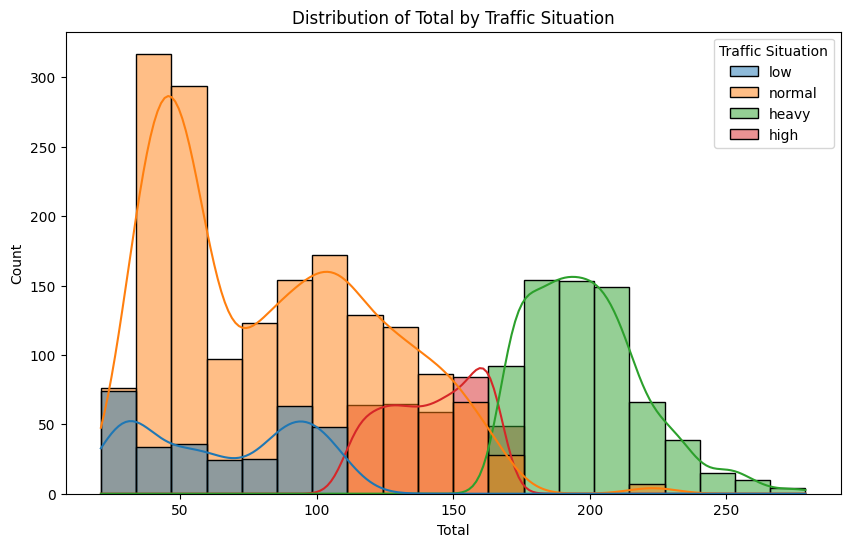

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total', hue='Traffic Situation', kde=True, bins=20)
plt.title('Distribution of Total by Traffic Situation')
plt.show()

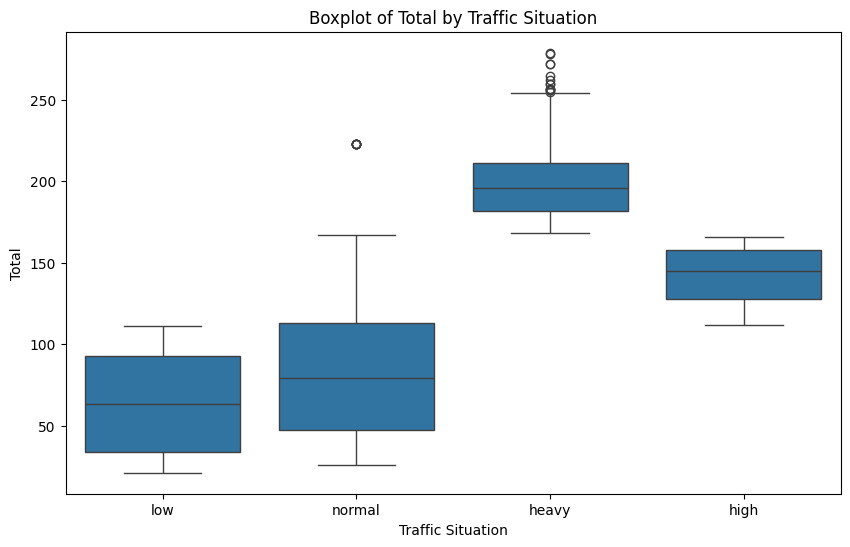

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title('Boxplot of Total by Traffic Situation')
plt.show()

In [ ]:
summary_stats = df.groupby('Traffic Situation')['Total'].describe()
print(summary_stats)

                    count        mean        std    min    25%    50%    75%  \
Traffic Situation                                                              
heavy               682.0  198.859238  21.344475  168.0  182.0  196.0  211.0   
high                321.0  142.433022  16.947051  112.0  128.0  145.0  158.0   
low                 304.0   64.993421  29.173431   21.0   34.0   63.5   93.0   
normal             1669.0   83.171360  39.717882   26.0   47.0   79.0  113.0   

                     max  
Traffic Situation         
heavy              279.0  
high               166.0  
low                111.0  
normal             223.0  


In [ ]:
def categorize_custom(row):
    if row['Total'] <= 50:
        return 'low'
    elif row['Total'] <= 100:
        return 'normal'
    else:
        return 'heavy'

# Apply the categorization
df['Calculated Traffic Situation'] = df.apply(categorize_custom, axis=1)

print(df)

                    Day of the week  Total Traffic Situation  \
Datetime                                                       
2024-03-10 00:00:00         Tuesday     39               low   
2024-03-10 00:15:00         Tuesday     55               low   
2024-03-10 00:30:00         Tuesday     55               low   
2024-03-10 00:45:00         Tuesday     58               low   
2024-03-10 01:00:00         Tuesday     94            normal   
...                             ...    ...               ...   
2024-03-09 22:45:00        Thursday     56            normal   
2024-03-09 23:00:00        Thursday     42            normal   
2024-03-09 23:15:00        Thursday     45            normal   
2024-03-09 23:30:00        Thursday     48            normal   
2024-03-09 23:45:00        Thursday     33            normal   

                    Calculated Traffic Situation  
Datetime                                          
2024-03-10 00:00:00                          low  
2024-03-10 00:

In [ ]:
summary_stats = df.groupby('Calculated Traffic Situation')['Total'].describe()
print(summary_stats)

                               count        mean        std    min    25%  \
Calculated Traffic Situation                                                
heavy                         1637.0  160.067807  39.111132  101.0  126.0   
low                            612.0   39.169935   6.991499   21.0   34.0   
normal                         727.0   74.155433  16.206036   51.0   57.0   

                                50%    75%    max  
Calculated Traffic Situation                       
heavy                         158.0  191.0  279.0  
low                            40.0   45.0   50.0  
normal                         76.0   89.0  100.0  


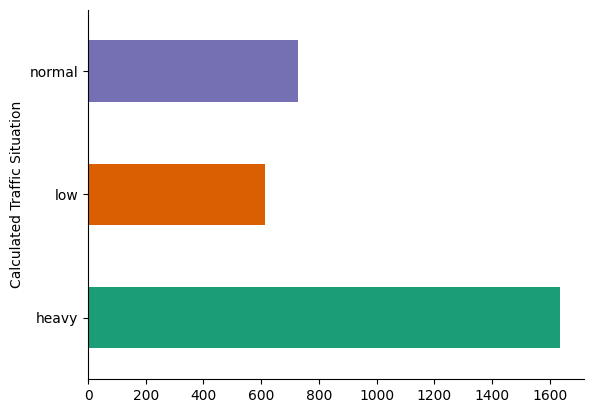

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Calculated Traffic Situation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

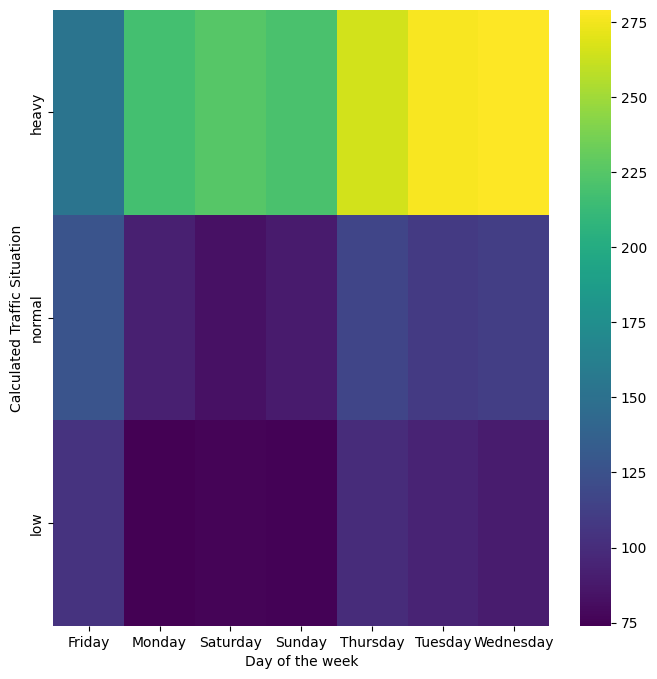

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Calculated Traffic Situation'].value_counts()
    for x_label, grp in df.groupby('Day of the week')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day of the week')
_ = plt.ylabel('Calculated Traffic Situation')

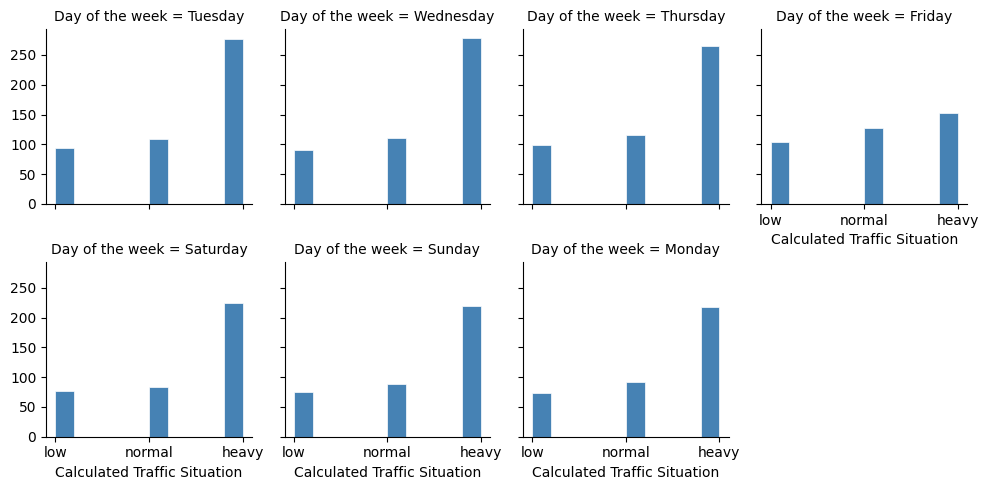

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Day of the week", col_wrap=4, height=2.5)
g = g.map(plt.hist, "Calculated Traffic Situation", color="steelblue", edgecolor="white", linewidth=0.5)
plt.show()

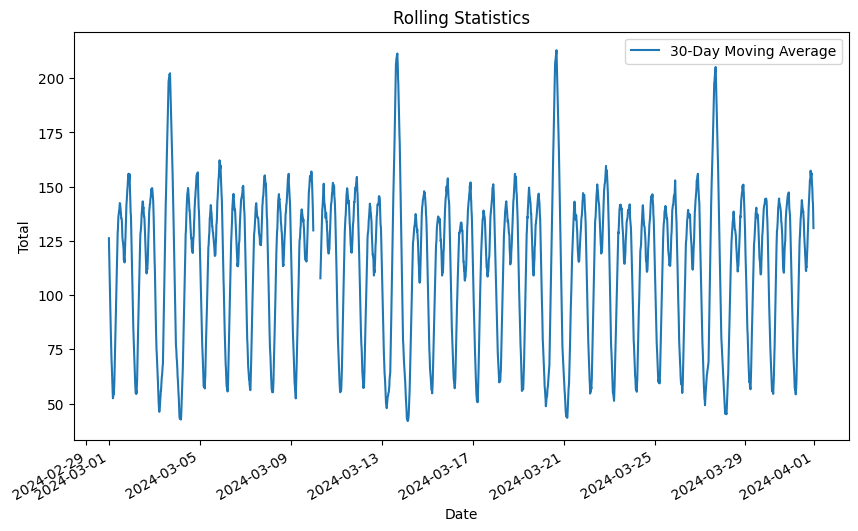

In [ ]:
df['Total'].rolling(window=30).mean().plot(figsize=(10, 6), label='30-Day Moving Average')
plt.legend()
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

In [ ]:
df

,Day of the week,Total,Traffic Situation,Calculated Traffic Situation
Datetime,,,,
2024-03-10 00:00:00,Tuesday,39,low,low
2024-03-10 00:15:00,Tuesday,55,low,normal
2024-03-10 00:30:00,Tuesday,55,low,normal
2024-03-10 00:45:00,Tuesday,58,low,normal
2024-03-10 01:00:00,Tuesday,94,normal,normal
...,...,...,...,...
2024-03-09 22:45:00,Thursday,56,normal,normal
2024-03-09 23:00:00,Thursday,42,normal,low
2024-03-09 23:15:00,Thursday,45,normal,low


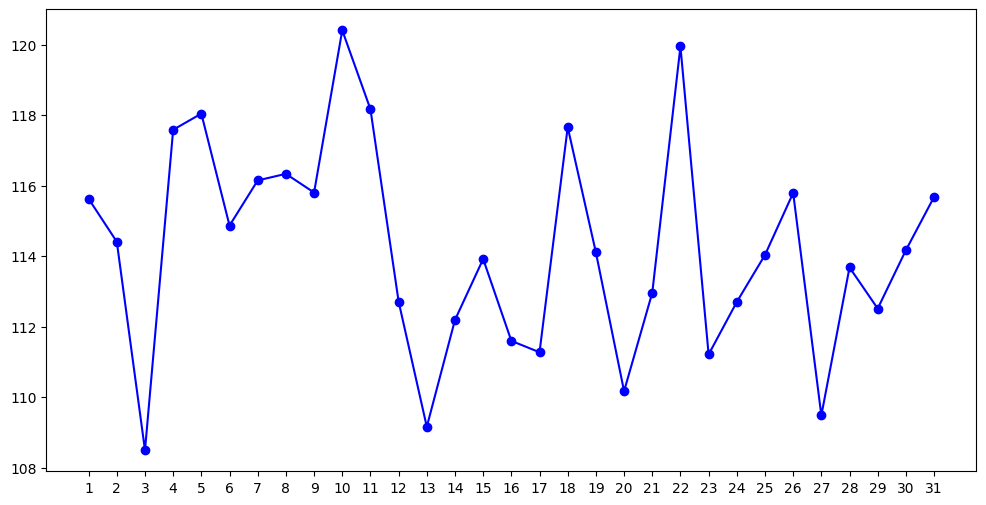

In [ ]:
df['Day'] = df.index.day
plt.figure(figsize=(12, 6))
daily_avg = df.groupby('Day')['Total'].mean()
plt.plot(daily_avg.index,daily_avg.values,marker='o', linestyle='-', color='b')
plt.plot()
plt.xticks(range(1, 32));

In [ ]:
df.head()

,Day of the week,Total,Traffic Situation,Calculated Traffic Situation,Day
Datetime,,,,,
2024-03-10 00:00:00,Tuesday,39,low,low,10
2024-03-10 00:15:00,Tuesday,55,low,normal,10
2024-03-10 00:30:00,Tuesday,55,low,normal,10
2024-03-10 00:45:00,Tuesday,58,low,normal,10
2024-03-10 01:00:00,Tuesday,94,normal,normal,10


In [ ]:
df.sort_index(inplace=True)

In [ ]:
# df.drop(columns=['Day of the week'],inplace=True)

In [ ]:
# df.drop(columns=['Total'],inplace=True)

In [ ]:
df.drop(columns=['Traffic Situation'],inplace=True)

In [ ]:
df

,Day of the week,Total,Calculated Traffic Situation
Datetime,,,
2024-03-01 00:00:00,Wednesday,48,low
2024-03-01 00:15:00,Wednesday,45,low
2024-03-01 00:30:00,Wednesday,39,low
2024-03-01 00:45:00,Wednesday,33,low
2024-03-01 01:00:00,Wednesday,42,low
...,...,...,...
2024-03-31 22:45:00,Tuesday,56,normal
2024-03-31 23:00:00,Tuesday,43,low
2024-03-31 23:15:00,Tuesday,59,normal


### Data Preprocessing

In [ ]:
# def change_day(day):
#   if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
#     return 'WeekDay'
#   else:
#     return 'WeekEnd'

# df['Day of the week'] = df['Day of the week'].apply(change_day)
# print(df)


In [ ]:
df.index

DatetimeIndex(['2024-03-01 00:00:00', '2024-03-01 00:15:00',
               '2024-03-01 00:30:00', '2024-03-01 00:45:00',
               '2024-03-01 01:00:00', '2024-03-01 01:15:00',
               '2024-03-01 01:30:00', '2024-03-01 01:45:00',
               '2024-03-01 02:00:00', '2024-03-01 02:15:00',
               ...
               '2024-03-31 21:30:00', '2024-03-31 21:45:00',
               '2024-03-31 22:00:00', '2024-03-31 22:15:00',
               '2024-03-31 22:30:00', '2024-03-31 22:45:00',
               '2024-03-31 23:00:00', '2024-03-31 23:15:00',
               '2024-03-31 23:30:00', '2024-03-31 23:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=2976, freq=None)

In [ ]:
# df['next_day'] = df['Day of the week'].shift(-1)  #we want it to know next day

In [ ]:
df.tail(7)

,Day of the week,Calculated Traffic Situation,Day
Datetime,,,
2024-03-31 22:15:00,Tuesday,low,31
2024-03-31 22:30:00,Tuesday,low,31
2024-03-31 22:45:00,Tuesday,normal,31
2024-03-31 23:00:00,Tuesday,low,31
2024-03-31 23:15:00,Tuesday,normal,31
2024-03-31 23:30:00,Tuesday,low,31
2024-03-31 23:45:00,Tuesday,low,31


In [ ]:
# df.drop(columns=['next_day'],inplace=True)

In [ ]:
# df.fillna('WeekDay', inplace=True)

In [ ]:
df.tail()

,Day of the week,Calculated Traffic Situation,Day
Datetime,,,
2024-03-31 22:45:00,Tuesday,normal,31
2024-03-31 23:00:00,Tuesday,low,31
2024-03-31 23:15:00,Tuesday,normal,31
2024-03-31 23:30:00,Tuesday,low,31
2024-03-31 23:45:00,Tuesday,low,31


# Split Data

In [ ]:
train = df.loc['2024-03-01 00:00:00':'2024-03-20 23:45:00']
val = df.loc['2024-03-21 00:00:00':'2024-03-26 23:45:00']
test = df.loc['2024-03-26 00:00:00':'2024-03-31 23:45:00']

train.shape, val.shape, test.shape

((1920, 3), (576, 3), (576, 3))

In [ ]:
df.head()

,Day of the week,Total,Calculated Traffic Situation
Datetime,,,
2024-03-01 00:00:00,Wednesday,48,low
2024-03-01 00:15:00,Wednesday,45,low
2024-03-01 00:30:00,Wednesday,39,low
2024-03-01 00:45:00,Wednesday,33,low
2024-03-01 01:00:00,Wednesday,42,low


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

cat_pipe = make_pipeline(OrdinalEncoder())

perprocessing_pipe = ColumnTransformer(
      [("cat_pre",cat_pipe , ["Day of the week","Calculated Traffic Situation"])
     ])
perprocessing_pipe

ColumnTransformer(transformers=[('cat_pre',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Day of the week',
                                  'Calculated Traffic Situation'])])

In [ ]:
train_pre = perprocessing_pipe.fit_transform(train)
val_pre = perprocessing_pipe.transform(val)
test_pre = perprocessing_pipe.transform(test)

In [ ]:
np.unique(train_pre[:,1])

array([0., 1., 2.])

In [ ]:
# Split data into x and y
# our target is traffic situation in index 3 taking window size 10
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 10
train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:,1], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:,1], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:,1], sequence_length=window_size)


In [ ]:
X_train, y_train = next(iter(train_Xy))
X_train.shape, y_train.shape

(TensorShape([128, 10, 2]), TensorShape([128]))

In [ ]:
X_val, y_val = next(iter(val_Xy))
X_val.shape, y_val.shape

(TensorShape([128, 10, 2]), TensorShape([128]))

In [ ]:
X_test, y_test = next(iter(test_Xy))
X_test.shape, y_test.shape

(TensorShape([128, 10, 2]), TensorShape([128]))

#Modeling

In [ ]:
from tensorflow import random
random.set_seed(42)

###GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
model = Sequential()
model.add(GRU(10, activation='tanh', return_sequences=True, input_shape=(10, 2)))
model.add(GRU(20, activation='tanh', return_sequences=True))
model.add(GRU(10, activation='tanh', return_sequences=False))
# 3 neuron for three outputs
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_Xy, epochs=100, validation_data=(val_Xy),callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3240 - loss: 1.1338 - val_accuracy: 0.5830 - val_loss: 0.9825
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5609 - loss: 0.9862 - val_accuracy: 0.5830 - val_loss: 0.9621
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5616 - loss: 0.9718 - val_accuracy: 0.5830 - val_loss: 0.9539
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5678 - loss: 0.9603 - val_accuracy: 0.5830 - val_loss: 0.9448
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5814 - loss: 0.9476 - val_accuracy: 0.5830 - val_loss: 0.9316
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5848 - loss: 0.9313 - val_accuracy: 0.5866 - val_loss: 0.9128
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5824 - loss: 0.9093 - val_accuracy: 0.5883 - val_loss: 0.8874
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5928 - loss: 0.8805 - val_accuracy: 0.5883 - val_l

###LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True, input_shape=(10, 2)))
model.add(LSTM(20, activation='tanh', return_sequences=True))
model.add(LSTM(10, activation='tanh', return_sequences=False))
# 3 neuron for three outputs
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_Xy, epochs=100, validation_data=(val_Xy),callbacks=[early_stopping])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.4320 - loss: 1.0755 - val_accuracy: 0.5830 - val_loss: 0.9912
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5608 - loss: 0.9909 - val_accuracy: 0.5830 - val_loss: 0.9654
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5605 - loss: 0.9754 - val_accuracy: 0.5830 - val_loss: 0.9602
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5617 - loss: 0.9679 - val_accuracy: 0.5830 - val_loss: 0.9515
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5694 - loss: 0.9544 - val_accuracy: 0.5707 - val_loss: 0.9359
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5635 - loss: 0.9341 - val_accuracy: 0.5654 - val_loss: 0.9138
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5634 - loss: 0.9129 - val_accuracy: 0.5689 - val_loss: 0.8965
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5646 - loss: 0.8942 - val_accuracy: 0.

###SimpleRNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', return_sequences=True, input_shape=(10, 2)))
model.add(SimpleRNN(20, activation='tanh', return_sequences=True))
model.add(SimpleRNN(10, activation='tanh', return_sequences=False))
# 3 neuron for three outputs
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_Xy, epochs=100, validation_data=(val_Xy),callbacks=[early_stopping])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4640 - loss: 1.0863 - val_accuracy: 0.5830 - val_loss: 0.9360
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5758 - loss: 0.9378 - val_accuracy: 0.5919 - val_loss: 0.9021
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5829 - loss: 0.8992 - val_accuracy: 0.5936 - val_loss: 0.8620
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5983 - loss: 0.8578 - val_accuracy: 0.6078 - val_loss: 0.8289
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6311 - loss: 0.8250 - val_accuracy: 0.6396 - val_loss: 0.8103
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6480 - loss: 0.8035 - val_accuracy: 0.6449 - val_loss: 0.8003
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6504 - loss: 0.7895 - val_accuracy: 0.6431 - val_loss: 0.7912
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6555 - loss: 0.7783 - val_accuracy: 0.

# Evaluation

In [ ]:
X_test, y_test = next(iter(test_Xy))
X_test.shape, y_test.shape

(TensorShape([128, 10, 2]), TensorShape([128]))

In [ ]:
y_test = y_test.numpy()

In [ ]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7104 - loss: 0.6703  


[0.6716484427452087, 0.7265625]

In [ ]:
argmax_y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, argmax_y_pred)

0.7265625

In [ ]:
from sklearn.metrics import classification_report

# Predict classes
predictions = model.predict(X_train)
y_pred = predictions.argmax(axis=1)
if y_train.ndim == 2:  # Check if y_test is one-hot encoded
    y_train = np.argmax(y_train, axis=1)

# Generate classification report
report = classification_report(y_train, y_pred)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        77
         1.0       0.62      0.95      0.75        22
         2.0       0.73      0.28      0.40        29

    accuracy                           0.79       128
   macro avg       0.74      0.72      0.68       128
weighted avg       0.79      0.79      0.76       128



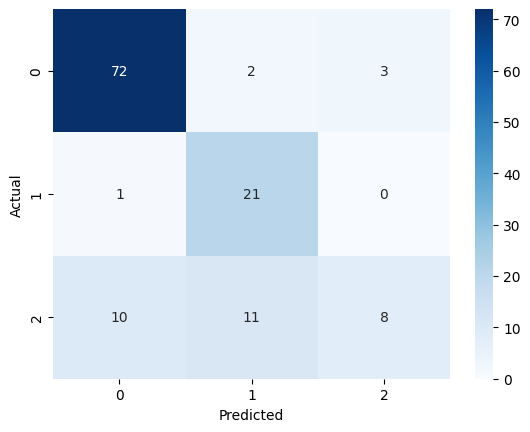

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
model.save('model.h5')